# Tests sur des données financières réelles

In [25]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Scripts
import data_enriched_functions as enriched
import utils
from LinearRegressionTL import LinearRegressionTL

## Extraction des datasets

In [26]:
df_ibm = pd.read_csv('./datasets/IBM.csv')
print(df_ibm.head(5))
print(df_ibm.shape[0])

# training dataset de 1962 à 2017 (exclu)
train_data_ibm = df_ibm[df_ibm['Date'] < '2017-01-01']
print(train_data_ibm.head(5))
print(train_data_ibm.shape[0])

# testing dataset de 2017 (inclu) à 2022
test_data_ibm = df_ibm[df_ibm['Date'] >= '2017-01-01']
print(test_data_ibm.head(5))
print(test_data_ibm.shape[0])

         Date      Open      High       Low     Close  Volume  Dividends  \
0  1962-01-02  1.692340  1.692340  1.673325  1.673325  407940        0.0   
1  1962-01-03  1.673325  1.687952  1.673325  1.687952  305955        0.0   
2  1962-01-04  1.687952  1.687952  1.670399  1.671131  274575        0.0   
3  1962-01-05  1.668936  1.668936  1.635294  1.638219  384405        0.0   
4  1962-01-08  1.636756  1.636756  1.594338  1.607502  572685        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
15236
         Date      Open      High       Low     Close  Volume  Dividends  \
0  1962-01-02  1.692340  1.692340  1.673325  1.673325  407940        0.0   
1  1962-01-03  1.673325  1.687952  1.673325  1.687952  305955        0.0   
2  1962-01-04  1.687952  1.687952  1.670399  1.671131  274575        0.0   
3  1962-01-05  1.668936  1.668936  1.635294  1.638219  384405        0.0   
4  1962-01-08  1.636756  1.636756  1.594338  1.60

In [36]:
df_hpe = pd.read_csv('./datasets/HPE.csv')
print(df_hpe.head(5))
print(df_hpe.shape[0])

# training dataset de 1962 à 2017 (exclu)
train_data_hpe = df_hpe[df_hpe['Date'] < '2017-01-01']
print(train_data_hpe.head(5))
print(train_data_hpe.shape[0])

# testing dataset de 2017 (inclu) à 2022
test_data_hpe = df_hpe[df_hpe['Date'] >= '2017-01-01']
print(test_data_hpe.head(5))
print(train_data_hpe.shape[0])

         Date      Open      High       Low     Close   Volume  Dividends  \
0  2015-10-19  8.988656  8.988656  8.007191  8.041203  2721233        0.0   
1  2015-10-20  7.895443  8.225837  7.895443  8.196684  1220907        0.0   
2  2015-10-21  8.381313  8.429902  7.968322  8.007191   135236        0.0   
3  2015-10-22  8.118942  8.284138  7.890581  8.235552   189261        0.0   
4  2015-10-23  8.381313  8.381313  8.186964  8.259845   103061        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
1694
         Date      Open      High       Low     Close   Volume  Dividends  \
0  2015-10-19  8.988656  8.988656  8.007191  8.041203  2721233        0.0   
1  2015-10-20  7.895443  8.225837  7.895443  8.196684  1220907        0.0   
2  2015-10-21  8.381313  8.429902  7.968322  8.007191   135236        0.0   
3  2015-10-22  8.118942  8.284138  7.890581  8.235552   189261        0.0   
4  2015-10-23  8.381313  8.381313  8.18

## Test régression linéaire classique sur IBM seul

### Transformation du dataset

In [28]:
# Hyper-paramètre d
d = 10

X_train_ibm, y_train_ibm, sc = utils.train_prep(train_data_ibm, d)
print("X_train_ibm=", X_train_ibm)
print("y_train_ibm=", y_train_ibm)

X_train_ibm=         Close_1   Close_2   Close_3   Close_4   Close_5   Close_6   Close_7  \
0      0.005551  0.005433  0.005203  0.004988  0.005121  0.005141  0.005264   
1      0.005433  0.005203  0.004988  0.005121  0.005141  0.005264  0.005285   
2      0.005203  0.004988  0.005121  0.005141  0.005264  0.005285  0.005336   
3      0.004988  0.005121  0.005141  0.005264  0.005285  0.005336  0.005213   
4      0.005121  0.005141  0.005264  0.005285  0.005336  0.005213  0.005029   
...         ...       ...       ...       ...       ...       ...       ...   
13830  0.859231  0.853929  0.868430  0.869574  0.867027  0.860322  0.860062   
13831  0.853929  0.868430  0.869574  0.867027  0.860322  0.860062  0.864844   
13832  0.868430  0.869574  0.867027  0.860322  0.860062  0.864844  0.863441   
13833  0.869574  0.867027  0.860322  0.860062  0.864844  0.863441  0.862037   
13834  0.867027  0.860322  0.860062  0.864844  0.863441  0.862037  0.860218   

        Close_8   Close_9  Close_10  


### Entraînement du modèle

In [29]:
#%%time
model = LinearRegression()

model.fit(X_train_ibm, y_train_ibm)

LinearRegression()

### Tester le modèle

In [30]:
predicted_stock_price = utils.predict_model_one_by_one(model, train_data_ibm, test_data_ibm.shape[0], sc, d)

test_ibm = test_data_ibm["Close"]
y_test_ibm = test_ibm.values.reshape(-1, 1)
print("y_test_ibm=", y_test_ibm)
print("predicted_stock_price=", predicted_stock_price)

y_test_ibm= [[124.06216431]
 [125.59817505]
 [125.18267822]
 ...
 [140.47000122]
 [141.        ]
 [139.17999268]]
predicted_stock_price= [[123.19594357]
 [123.21583378]
 [123.26302219]
 ...
 [141.35332962]
 [141.36676191]
 [141.38019476]]


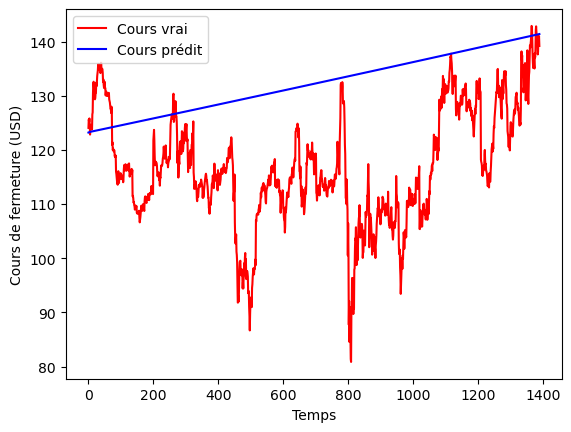

RMSE = 18.756130957591473.


18.756130957591473

In [31]:
utils.plot_predictions(y_test_ibm, predicted_stock_price)
utils.return_rmse(y_test_ibm, predicted_stock_price)

## Tester avec Small=HPE et Big=IBM

In [32]:
# Hyper-paramètre d
d = 10

X_train_hpe, y_train_hpe, sc = utils.train_prep(train_data_hpe, d)

print("X_train_hpe=", X_train_hpe)
print("y_train_hpe=", y_train_hpe)

X_train_hpe=       Close_1   Close_2   Close_3   Close_4   Close_5   Close_6   Close_7  \
0    0.369774  0.339517  0.375981  0.379860  0.334863  0.281331  0.324001   
1    0.339517  0.375981  0.379860  0.334863  0.281331  0.324001  0.298399   
2    0.375981  0.379860  0.334863  0.281331  0.324001  0.298399  0.202974   
3    0.379860  0.334863  0.281331  0.324001  0.298399  0.202974  0.185130   
4    0.334863  0.281331  0.324001  0.298399  0.202974  0.185130  0.175044   
..        ...       ...       ...       ...       ...       ...       ...   
288  0.986643  0.943710  0.946074  0.945287  0.930318  0.911413  0.930318   
289  0.943710  0.946074  0.945287  0.930318  0.911413  0.930318  0.938984   
290  0.946074  0.945287  0.930318  0.911413  0.930318  0.938984  0.942923   
291  0.945287  0.930318  0.911413  0.930318  0.938984  0.942923  0.932682   
292  0.930318  0.911413  0.930318  0.938984  0.942923  0.932682  0.937408   

      Close_8   Close_9  Close_10  
0    0.298399  0.202974  0

In [33]:
test_hpe = test_data_hpe["Close"]
y_test_hpe = test_hpe.values.reshape(-1, 1)
print("y_test_hpe=", y_test_hpe)

y_test_hpe= [[11.44575214]
 [11.5690918 ]
 [11.62335777]
 ...
 [13.18999958]
 [13.06000042]
 [13.11999989]]


### Tester sans le transfer learning

predicted_stock_s= [[11.39096149]
 [11.39728573]
 [11.40447704]
 ...
 [12.49306873]
 [12.49308062]
 [12.49309246]]


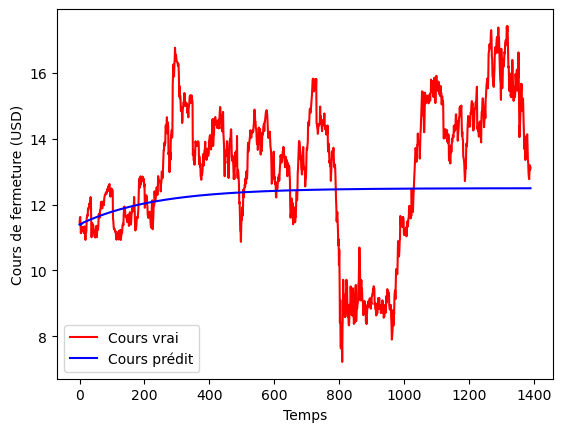

RMSE = 2.20740212474767.


2.20740212474767

In [34]:
model = LinearRegression()
model.fit(X_train_hpe, y_train_hpe)

predicted_stock_price_s = utils.predict_model_one_by_one(model, train_data_hpe, test_data_hpe.shape[0], sc, d)
print("predicted_stock_s=", predicted_stock_price_s)


utils.plot_predictions(y_test_hpe, predicted_stock_price_s)
utils.return_rmse(y_test_hpe, predicted_stock_price_s)

### Tester avec transfer learning

predicted_stock_TL= [[11.40751549]
 [11.41172287]
 [11.42224452]
 ...
 [16.31091381]
 [16.31567048]
 [16.32042932]]


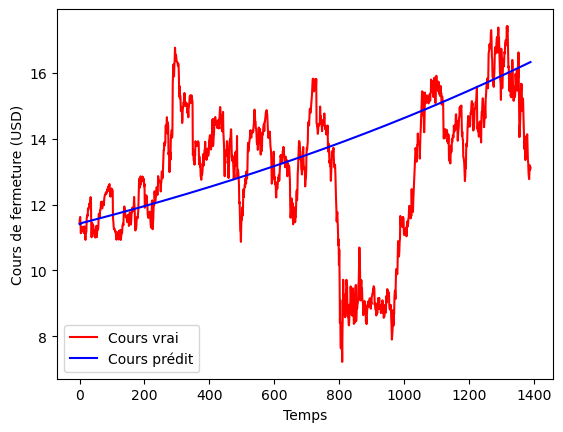

RMSE = 2.299364136328509.


2.299364136328509

In [35]:
X_s = X_train_hpe
Y_s = y_train_hpe

X_b = X_train_ibm
Y_b = y_train_ibm

model_TL = LinearRegressionTL(d=10, method="plug")
model_TL.fit(X_s, Y_s, X_b, Y_b)
""""""
# modif à la main (on pénalise beaucoup plus )
model_TL.lamda = 10
W = enriched.compute_W(model_TL.lamda, X_s, X_b, X_s)
beta_hat = enriched.compute_beta_hat(W, model_TL.beta_hat_s, model_TL.beta_hat_b, model_TL.d)
model_TL.beta_hat = beta_hat


predicted_stock_price_TL = utils.predict_model_one_by_one(model_TL, train_data_hpe, test_data_hpe.shape[0], sc, d)
print("predicted_stock_TL=", predicted_stock_price_TL)

utils.plot_predictions(y_test_hpe, predicted_stock_price_TL)
utils.return_rmse(y_test_hpe, predicted_stock_price_TL)